# A simple map

In [ ]:
%%capture 
%load_ext autoreload
%autoreload 2

from antarctic_plots import maps, fetch, regions

c:\Users\matthewt\AppData\Local\miniforge3\envs\antarctic_plots\lib\site-packages\xarray\backends\cfgrib_.py:29: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(
100%|########################################| 829M/829M [00:00<00:00, 833GB/s]
SHA256 hash of downloaded file: 71ff97f8fb034fbfe235cd1cad044eeea2ae1543e82115afbd886a24c1e71069
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
c:\Users\matthewt\AppData\Local\miniforge3\envs\antarctic_plots\lib\site-packages\xarray\backends\plugins.py:64: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)
makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)
psconvert [ERROR]: Registry registered C:\Program Files (x86)

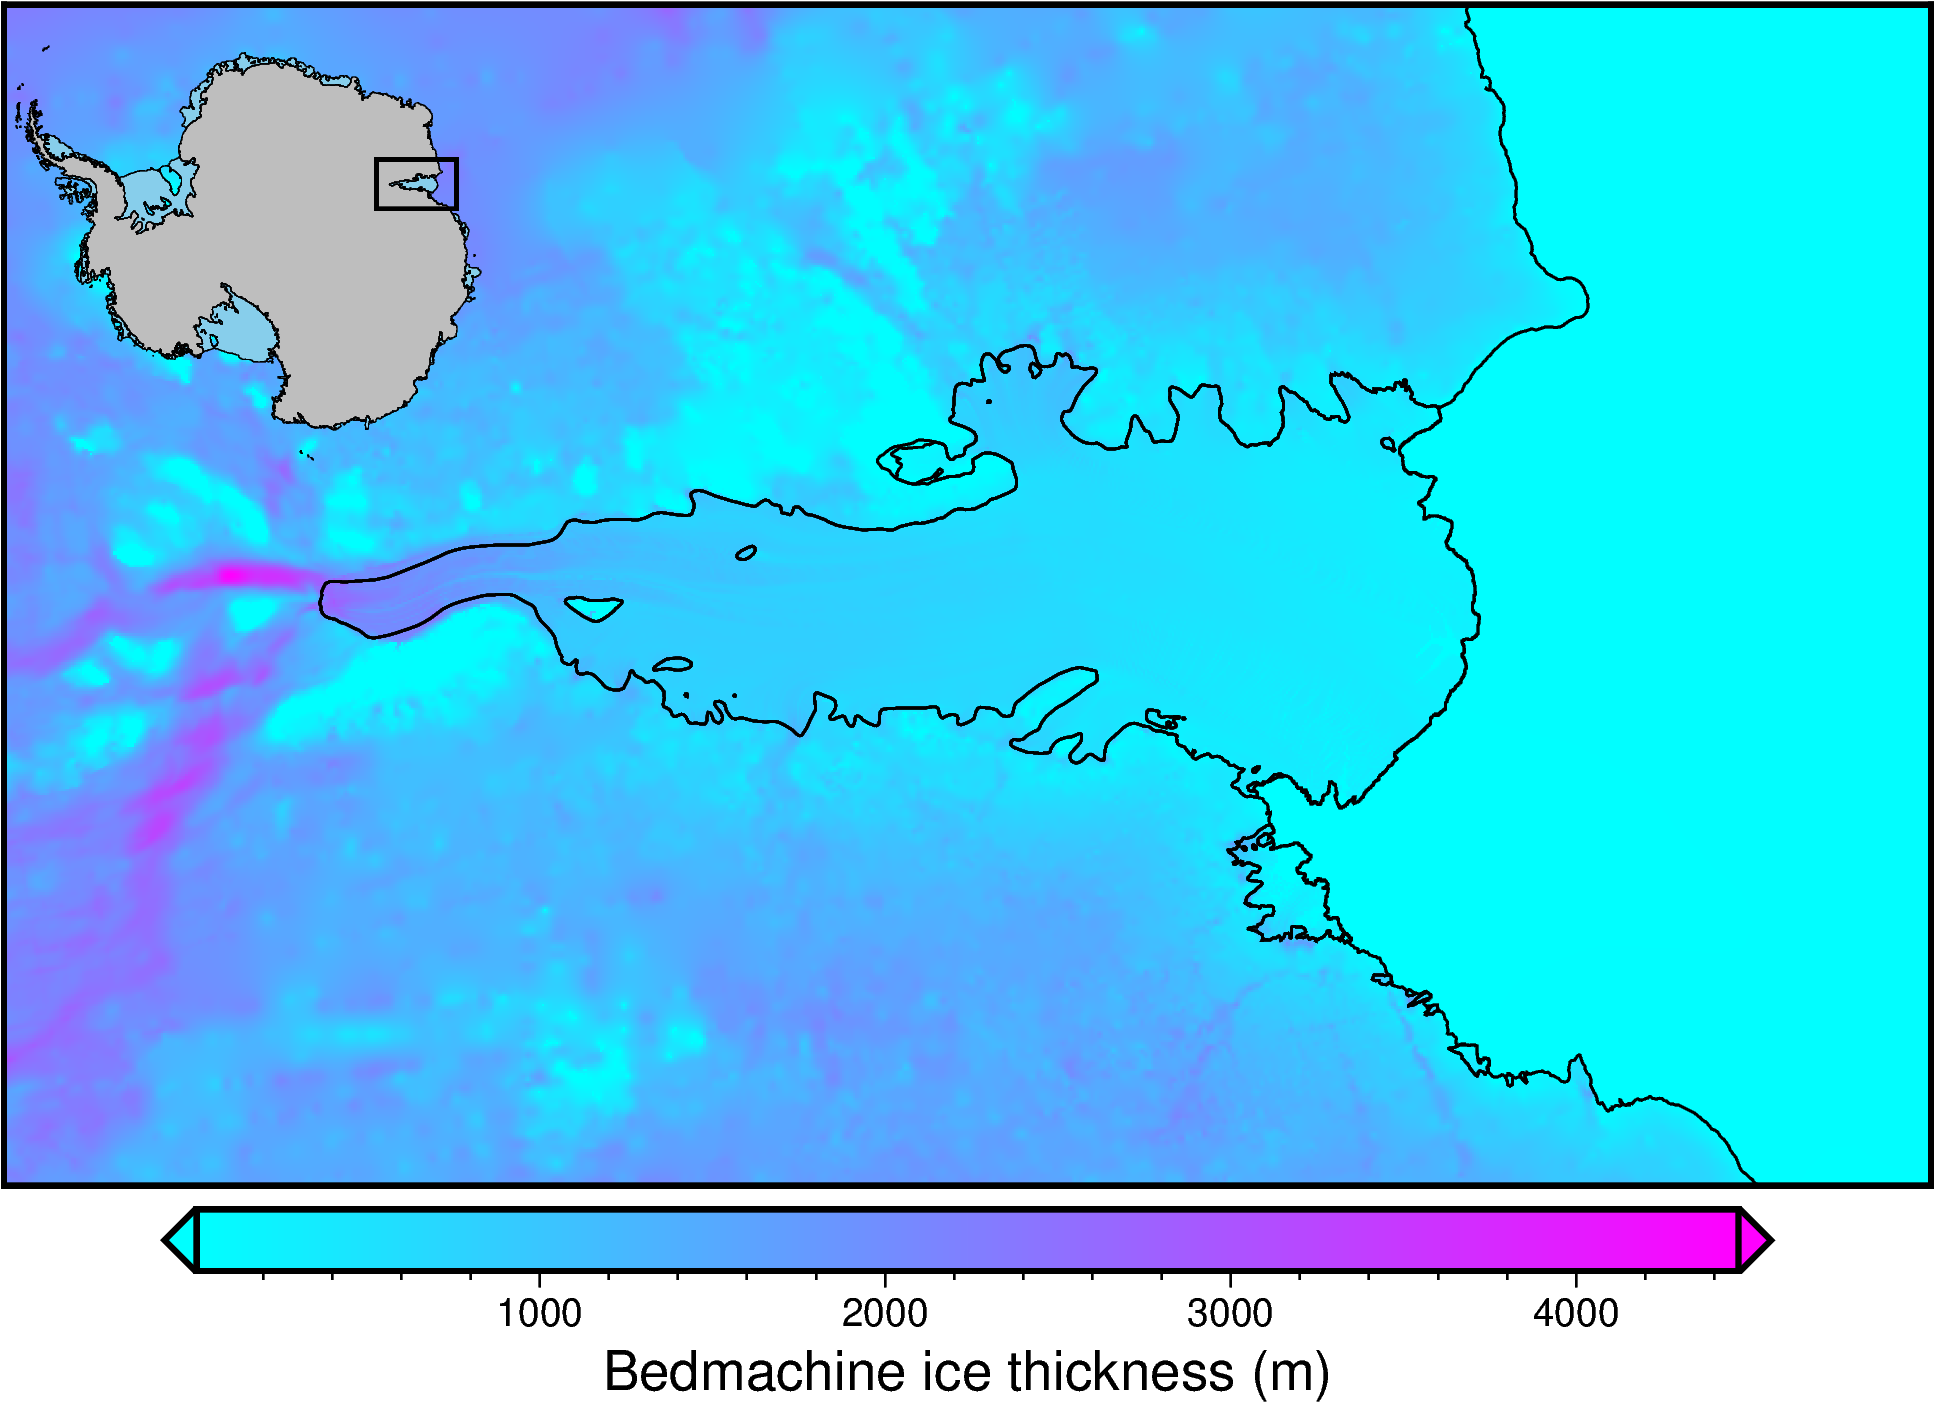

In [1]:
# load a grid file to plot
ice_thickness = fetch.bedmachine(
    layer="thickness",  # choose which layer to plot ['thickness', 'surface', 'bed', 'icebase']
    reference="ellipsoid",  # optionally convert from geoid to ellipsoid
    region=regions.amery_ice_shelf,  # choose a pre-defined region, or set your own
    spacing=1e3,  # optionally change the grid spacing
)

# plot with automatic figure properties
fig = maps.plot_grd(
    ice_thickness,  # set grid to plot
    cmap="cool",  # choose GMT colorscale
    coast=True,  # plot grounding and coastlines
    cbar_label="Bedmachine ice thickness (m)",  # add label
    inset=True,  # optionally add inset map showing location
)

# save the figure to use in the Gallery examples
fig.savefig('outputs/basic_map.png')

# display the figure
fig.show()